3 Application of Autoencoder: Denoising.
In this section we will build and denoising autoencoders proposed by Y. Bengio et. Al. (Learning Deep
Architectures 2009).As suggested by the original work we will work with image data, and a gaussian
noise to it, and then train an convolutional autoencoder model to remove the noise. By the end of this
section you should be able to:
• Build and train a denoising autoencoder.
• Understand the impact of noise on image data and how autoencoders help in denoising.
• Evaluate the model performance visually.
For the demonstration we will be using MNIST Handwritten Dataset.
Step 1: Load, pre - process and add a Noise to the Dataset:
1.1 Tasks to Do:
1. Load the MNIST dataset using keras.
2. Normalize the images to be in the range [0 - 1] {rescaling}.
3. Reshape the images to be 28 × 28 × 1.
4. Add a Gaussian noise to the images with noise factor of 0.5.
5. Clip the noisy images to ensure all pixel values are between 0 and 1.
6. Visualize the Input image and Noise added image.

Add Noise and Visualize Data.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


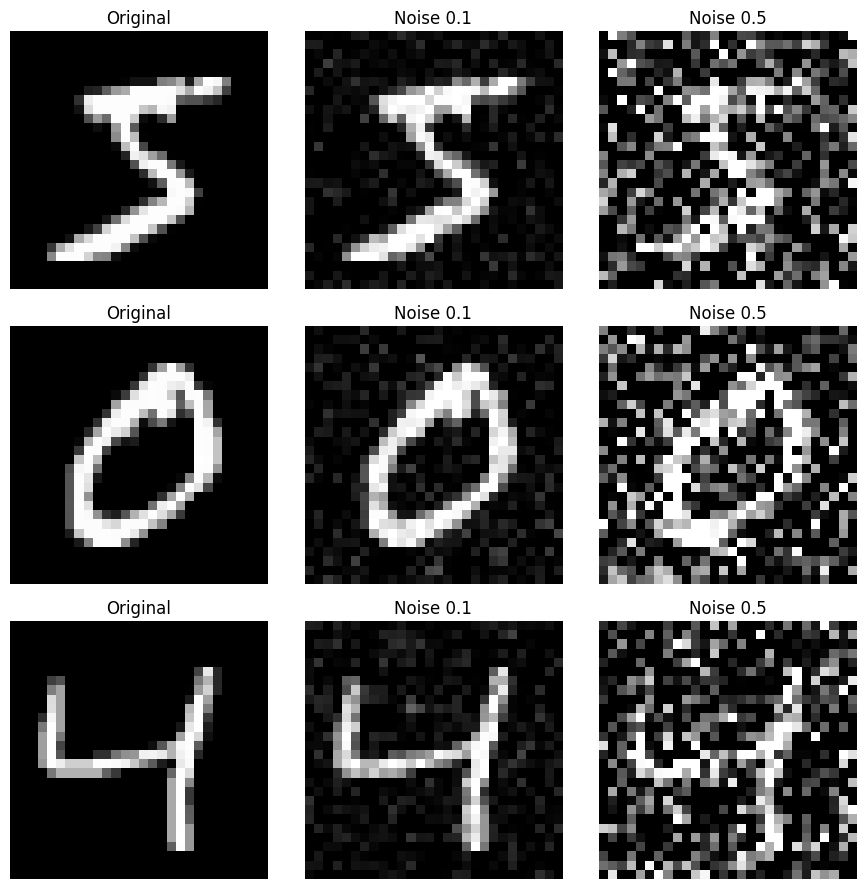

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load and preprocess MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
#Generate noisy versions
noise_factor_low = 0.1
noise_factor_high = 0.5
x_train_noisy_low = x_train + noise_factor_low * np.random.normal(loc=0.0, scale=1.0, size=x_train.
shape)
x_train_noisy_high = x_train + noise_factor_high * np.random.normal(loc=0.0, scale=1.0, size=x_train
.shape)
x_test_noisy_low = x_test + noise_factor_low * np.random.normal(loc=0.0, scale=1.0, size=x_test.
shape)
x_test_noisy_high = x_test + noise_factor_high * np.random.normal(loc=0.0, scale=1.0, size=x_test.
shape)
# Clip pixel values to [0, 1]
x_train_noisy_low = np.clip(x_train_noisy_low, 0., 1.)
x_test_noisy_low = np.clip(x_test_noisy_low, 0., 1.)
x_train_noisy_high = np.clip(x_train_noisy_high, 0., 1.)
x_test_noisy_high = np.clip(x_test_noisy_high, 0., 1.)
#Visualize in a 3 x 3 grid
n = 3 # number of images to show
plt.figure(figsize=(9, 9))
for i in range(n):
  # Original image
  ax = plt.subplot(n, 3, i * 3 + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title("Original")
  plt.axis('off')
  # Low noise image
  ax = plt.subplot(n, 3, i * 3 + 2)
  plt.imshow(x_train_noisy_low[i].reshape(28, 28), cmap='gray')
  plt.title("Noise 0.1")
  plt.axis('off')
  # High noise image
  ax = plt.subplot(n, 3, i * 3 + 3)
  plt.imshow(x_train_noisy_high[i].reshape(28, 28), cmap='gray')
  plt.title("Noise 0.5")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam


Step 2: Build the Convolutional Denoising Autoencoder Model:
2.1 Tasks to Do:
• Encoder:
– Convolutional Layers + ReLU activation.
– Maxpooling to down-sample the features.
• Decoder:
– Convolutional layers + ReLU activation.
– Upsampling to upsample the feature maps.
– Final Layer with sigmoid activation to keep output pixels in range [0, 1].
• Transpose Convolutional is achieved in Keras using convolutional and Upsampling
operations.
• Compile the Model with binary crossentropy loss and ADAM optimizer.
Sample Code Implementation with Keras:
We will be using functional approach, but free to use any architecture.
• Encoder:

Building Encoder.

In [ ]:
def build_encoder(input_shape=(28, 28, 1)):
  """
  Builds the encoder part of the convolutional autoencoder.
  Parameters:
  input_shape (tuple): Shape of the input image. Default is (28, 28, 1) for MNIST.
  Returns:
  input_img (Keras Input): Input layer of the model.
  encoded (Keras Tensor): Encoded representation after convolution and pooling.
  """
  input_img = Input(shape=input_shape, name="input")
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  x = MaxPooling2D((2, 2), padding='same')(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  encoded = MaxPooling2D((2, 2), padding='same', name="encoded")(x)
  return input_img, encoded

• Decoder:

Building Decoder.

In [ ]:
def build_decoder(encoded_input):
  """
  Builds the decoder part of the convolutional autoencoder.
  Parameters:
  encoded_input (Keras Tensor): The output from the encoder.
  Returns:
  decoded (Keras Tensor): The reconstructed output after upsampling and
  convolution.
  """
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded_input)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name="decoded")(x)
  return decoded

• Complete Autoencoder:

Building Autoencdoder.

In [ ]:
def build_autoencoder():
  """
  Constructs and compiles the full convolutional autoencoder by connecting encoder and
  decoder.
  Returns:
  autoencoder (Keras Model): Compiled autoencoder model.
  """
  input_img, encoded_output = build_encoder()
  decoded_output = build_decoder(encoded_output)
  autoencoder = Model(inputs=input_img, outputs=decoded_output, name="autoencoder")
  autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
  return autoencoder


Compile the Model:

Compile the Model.

In [ ]:
autoencoder = build_autoencoder()
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoded (MaxPooling2D)               │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoded (Conv2D)                     │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Step 3: Train the Autoencoder:
3.1 Tasks to Do:
• Train the autoencoder using the noisy images as input and the clean images as the target.
• Monitor the training and validation loss during training.
Training Autoencoder

In [ ]:
# Build the autoencoder from previous steps
autoencoder = build_autoencoder()
# Train with noisy input and clean target
history = autoencoder.fit(
x_train_noisy_high, x_train,
epochs=10,
batch_size=128,
shuffle=True,
validation_data=(x_test_noisy_high, x_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 182s 380ms/step - loss: 0.2386 - val_loss: 0.1113
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 381ms/step - loss: 0.1104 - val_loss: 0.1050
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 392ms/step - loss: 0.1047 - val_loss: 0.1016
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 370ms/step - loss: 0.1021 - val_loss: 0.1003
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 380ms/step - loss: 0.1003 - val_loss: 0.0987
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 198s 371ms/step - loss: 0.0989 - val_loss: 0.0976
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 370ms/step - loss: 0.0980 - val_loss: 0.0970
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 178s 379ms/step - loss: 0.0972 - val_loss: 0.0963
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 172s 367ms/step - loss: 0.0966 - val_loss: 0.0958
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 368ms/step - loss: 0.0960 - val_loss: 0.0954


Step 4: Evaluate the Autoencoder:
4.1 Tasks to Do:
• Use the trained autoencoder to predict the denoised images from the noisy test images.
• Display the original noisy images, the denoised images, and the clean images.

Evaluate Autoencoder

In [ ]:
# Predict the denoised images from noisy test images
denoised_images = autoencoder.predict(x_test_noisy)
# Function to display images
def plot_images(noisy_images, denoised_images, clean_images, n=10):
  plt.figure(figsize=(20, 6))
  for i in range(n):
    # Plot noisy images
    plt.subplot(3, n, i + 1)
    plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis('off')
    # Plot denoised images
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis('off')
    # Plot clean images
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(clean_images[i].reshape(28, 28), cmap='gray')
    plt.title("Clean Image")
    plt.axis('off')
  plt.show()
# Display the first 10 images
plot_images(x_test_noisy, denoised_images, x_test, n=10)

4 Exercise: Build a Denoising Convolutional Autoencoder
Dataset: Devnagari Handwritten Digit Dataset:
Objective:

The objective of this task is to build a Denoising Convolutional Autoencoder with at least 4 lay-
ers deep to remove noise from images in the Devnagari Handwritten dataset. The task involves

preprocessing the dataset, adding noise to the images, and training a deep convolutional autoencoder
to clean them. This exercise will help you explore both convolutional neural networks and unsupervised
learning techniques.

For the Devnagari Handwritten datasets from earlier week, Build a Denoising Convolutional Autoen-
coder at least 4 layer deep.

Also check https://blog.keras.io/building-autoencoders-in-keras.html

4.1 Instructions:
1. Dataset Preparation and Preprocessing:
• Load the Devnagari dataset using PIL.
• Normalize the images to the range [0, 1].
• Reshape the images to include a channel dimension for Keras Compatibility.
• Split the dataset into training and validation sets.
• Add noise to the images for denoising purposes (Gaussian noise or salt-and-pepper noise).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

3. Load Devnagari Dataset

In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/devnagari_digit.zip'
extract_to = '/content/devnagiri_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset unzipped!")

Dataset unzipped!


In [ ]:
def load_images_from_folder(folder_path, img_size=(32, 32)):
    images = []
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                try:
                    img = Image.open(img_path).convert("L")
                    img = img.resize(img_size)
                    img_array = np.array(img) / 255.0
                    images.append(img_array)
                except:
                    pass
    return np.array(images)

dataset_path = extract_to
images = load_images_from_folder(dataset_path)
images = images.reshape(-1, 32, 32, 1)

print(f"Total images loaded: {images.shape[0]}")

Total images loaded: 0


 4. Add Gaussian Noise

In [ ]:
def add_noise(imgs, noise_factor=0.5):
    noisy_imgs = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape)
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    return noisy_imgs

noisy_images = add_noise(images)
